<a href="https://colab.research.google.com/github/kabilan942/kaggle/blob/main/Kaggle_House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Exploration and Preprocessing**

### **Importing Dataset and Exploration**

In [3]:
train_data = pd.read_csv('train_house_data.csv')
test_data = pd.read_csv('test_house_data.csv')

In [4]:
print('Shape of training dataset:',train_data.shape)
print('Shape of test dataset:',test_data.shape)

Shape of training dataset: (1460, 81)
Shape of test dataset: (1459, 80)


In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The null values in each column of the dataset

In [7]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

To visualize the null values in each column of the train data set

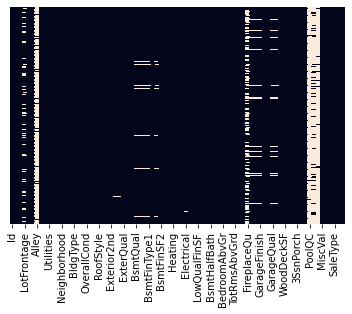

In [8]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)
sns.set(rc = {'figure.figsize':(10, 10)})

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

To visualize the null values in each column of the test data set

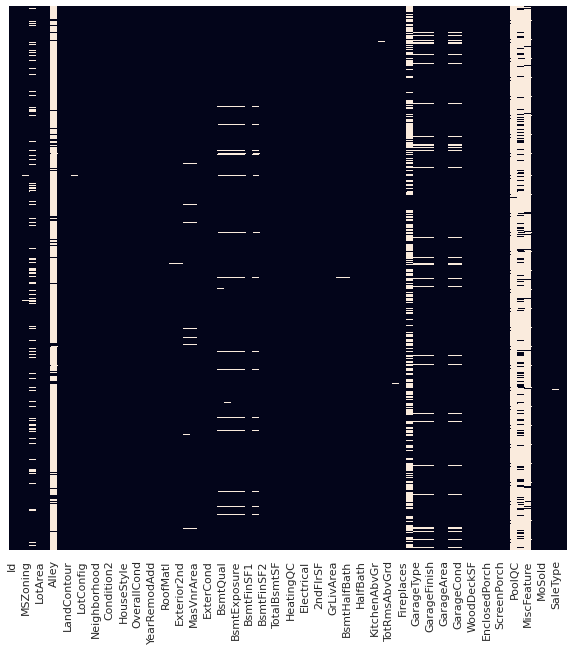

In [10]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)
sns.set(rc = {'figure.figsize':(10, 10)})

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

The train and test dataset contains missing values.

Removing the features which has more than half the total count of samples as missing values; since imputing values in such features will have less accuracy.

Therefore, the following features are removed in the train and test dataset:
* 'Alley'
* 'GarageYrBlt'
* 'PoolQC'
* 'Fence'
* 'MiscFeature'
* 'Id' (Since Id doesn't contribute to predicting the 'SalePrice' (target variable))

In [12]:
train_data.drop(['Alley', 'GarageYrBlt','PoolQC', 'Fence', 'MiscFeature','Id'], axis=1, inplace=True)
test_data.drop(['Alley', 'GarageYrBlt','PoolQC', 'Fence', 'MiscFeature','Id'], axis=1, inplace=True)

In [13]:
print('After removing certain features:')
print('Shape of training dataset:',train_data.shape)
print('Shape of test dataset:',test_data.shape)

After removing certain features:
Shape of training dataset: (1460, 75)
Shape of test dataset: (1459, 74)


Using mode( ) and mean( ) to fill the rest of the missing values features in the training and test dataset.

**mode( )** to be used for categorical features - **'object'**

**mean( )** to be used for **'integer'** and '**float'** type features 

In [14]:
train_data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [15]:
train_data['LotShape'].mode()

0    Reg
dtype: object

In [16]:
train_data['LotShape'].mode()[0]

'Reg'

In [17]:
train_data['LotArea'].mean()

10516.828082191782

### **Imputing values in the training dataset:**

In [18]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['BsmtFinSF1']=train_data['BsmtFinSF1'].fillna(train_data['BsmtFinSF1'].mean())
train_data['BsmtFinSF2']=train_data['BsmtFinSF2'].fillna(train_data['BsmtFinSF2'].mean())
train_data['BsmtUnfSF']=train_data['BsmtUnfSF'].fillna(train_data['BsmtUnfSF'].mean())
train_data['TotalBsmtSF']=train_data['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].mean())
train_data['GarageCars']=train_data['GarageCars'].fillna(train_data['GarageCars'].mean())
train_data['GarageArea']=train_data['GarageArea'].fillna(train_data['GarageArea'].mean())

train_data['MSZoning'] = train_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])
train_data['MSZoning']=train_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])
train_data['BsmtCond']=train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
train_data['Utilities']=train_data['Utilities'].fillna(train_data['Utilities'].mode()[0])
train_data['Exterior1st']=train_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
train_data['Exterior2nd']=train_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
train_data['BsmtFullBath']=train_data['BsmtFullBath'].fillna(train_data['BsmtFullBath'].mode()[0])
train_data['BsmtHalfBath']=train_data['BsmtHalfBath'].fillna(train_data['BsmtHalfBath'].mode()[0])
train_data['KitchenQual']=train_data['KitchenQual'].fillna(train_data['KitchenQual'].mode()[0])
train_data['Functional']=train_data['Functional'].fillna(train_data['Functional'].mode()[0])
train_data['SaleType']=train_data['SaleType'].fillna(train_data['SaleType'].mode()[0])
train_data['Electrical']=train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

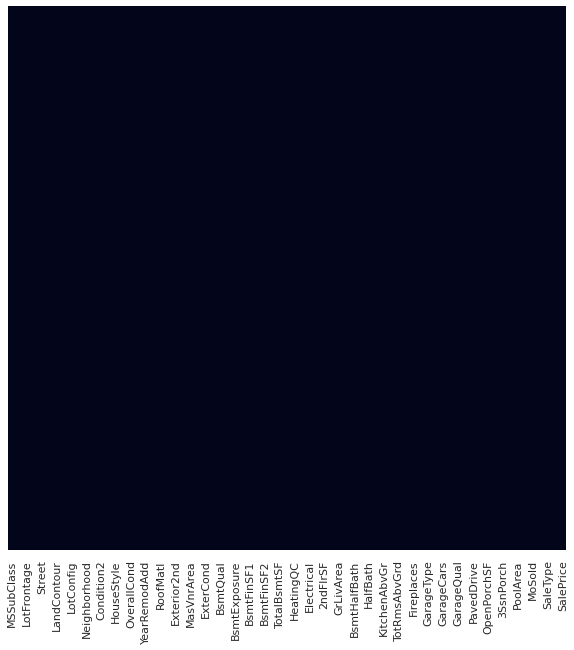

In [20]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

### **Imputing values in the test dataset:**

In [21]:
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())

test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['MSZoning']=test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['SaleType']=test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

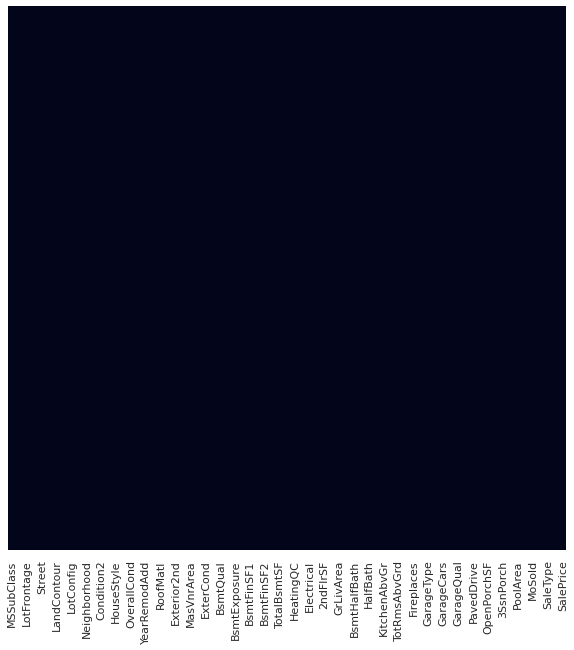

In [23]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

### **Encoding Categorical Variables:**

In [24]:
categorical_columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                       'Neighborhood', 'Condition2','BldgType','Condition1','HouseStyle','SaleType',
                       'SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl','Exterior1st',
                       'Exterior2nd','MasVnrType','Heating','HeatingQC','CentralAir',
                       'Electrical','KitchenQual','Functional', 'FireplaceQu','GarageType',
                       'GarageFinish','GarageQual','GarageCond','PavedDrive']

In [25]:
len(categorical_columns)

39

In [26]:
def one_hot_encode(columns):
    df_final = final_data
    i=0
    for fields in columns:
        print(fields)
        df1 = pd.get_dummies(final_data[fields],drop_first=True)
        final_data.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
    df_final = pd.concat([final_data,df_final],axis=1)
    return df_final

In [27]:
final_data = pd.concat([train_data,test_data],axis=0)

In [28]:
final_data.shape

(2919, 75)

In [29]:
final_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [30]:
final_data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,NaN
1458,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,11,2006,WD,Normal,NaN


In [31]:
final_data = one_hot_encode(categorical_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [32]:
final_data.shape

(2919, 236)

In [33]:
final_df =final_data.loc[:,~final_data.columns.duplicated()]

In [34]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [35]:
final_df.shape

(2919, 176)

In [36]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


### **Choosing features and targets for training:**

In [37]:
train_df = final_df.iloc[:1460,:]
test_df = final_df.iloc[1460:,:]

In [38]:
print('Shape of training dataset after data preprocessing:',train_df.shape)
print('Shape of test dataset after data preprocessing:',test_df.shape)

Shape of training dataset after data preprocessing: (1460, 176)
Shape of test dataset after data preprocessing: (1459, 176)


In [39]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [40]:
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [41]:
test_df.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
# Features
X_train = train_df.drop(['SalePrice'],axis=1)

# Target variable
y_train = train_df['SalePrice']

In [43]:
print('Shape of feature matrix in training data:', X_train.shape)
print('Shape of target vector in training data:', y_train.shape)

Shape of feature matrix in training data: (1460, 175)
Shape of target vector in training data: (1460,)


## **Model Training with Hyper Parameter Optimization**

In [44]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [47]:
xgb_regressor = XGBRegressor()

The list of values for each tuneable parameter: 

In [46]:
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.15, 0.20, 0.25]
n_estimators = [100, 500, 1000, 1250, 1500]
booster=['gbtree','gblinear']
min_child_weight=[1, 2, 3, 4]
base_score=[0.25, 0.5, 0.75, 1]

Defining the Hyperparameter grid:

In [48]:
hpt_grid = {'max_depth':max_depth, 'learning_rate':learning_rate, 
            'n_estimators': n_estimators, 'booster':booster, 
            'min_child_weight':min_child_weight, 'base_score':base_score}

In [49]:
xgb_hpt = RandomizedSearchCV(estimator = xgb_regressor, param_distributions = hpt_grid, 
                             cv=5, n_iter=50, scoring = 'neg_mean_absolute_error',
                             n_jobs = 4, verbose = 5, return_train_score = True, 
                             random_state = 7)

Fitting the model on the Training Data to get the best possible parameters:

In [50]:
xgb_hpt.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[15:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 1000, 1250,
                                                         1500]},
                   random_state=7, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

Calling the 'best_estimator_' of the xgb_hpt model to get the best estimator and its coressponding parameters 

In [51]:
xgb_hpt.best_estimator_

XGBRegressor(base_score=1, learning_rate=0.05, max_depth=2, n_estimators=1000)

In [52]:
xgb_model = XGBRegressor(base_score=1, learning_rate=0.05, max_depth=2, n_estimators=1000)

In [53]:
xgb_model.fit(X_train, y_train)

[15:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, learning_rate=0.05, max_depth=2, n_estimators=1000)

## **Evaluation of Training Data**

In [56]:
from sklearn.metrics import mean_absolute_percentage_error

error = mean_absolute_percentage_error(y_train, xgb_model.predict(X_train))
print('Error in training data {0} %:'.format(100*error))

Error in training data 5.945850233920811 %:


Predicting labels of test data using xgb_model:

In [58]:
y_pred = xgb_model.predict(test_df)

In [59]:
y_pred

array([118844.336, 162050.81 , 184606.78 , ..., 173570.69 , 125547.49 ,
       241835.73 ], dtype=float32)